In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("Bodyfat.csv")

In [5]:
data.shape

(252, 17)

In [6]:
data.describe()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,18.938492,1.055574,44.884921,178.924405,70.148810,25.436905,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,72.890329,7.750856,0.019031,12.602040,29.389160,3.662856,3.648111,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,1.000000,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,63.750000,12.800000,1.041400,35.750000,159.000000,68.250000,23.100000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,126.500000,19.000000,1.054900,43.000000,176.500000,70.000000,25.050000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,189.250000,24.600000,1.070400,54.000000,197.000000,72.250000,27.325000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,252.000000,45.100000,1.108900,81.000000,363.150000,77.750000,48.900000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
df = data.iloc[:,1:data.shape[1]]
df = df.drop(columns = "DENSITY") # drop id,density column
cols = df.columns

BODYFAT      0
AGE          0
WEIGHT       0
HEIGHT       0
ADIPOSITY    0
NECK         0
CHEST        0
ABDOMEN      0
HIP          0
THIGH        0
KNEE         0
ANKLE        0
BICEPS       0
FOREARM      0
WRIST        0
dtype: int64

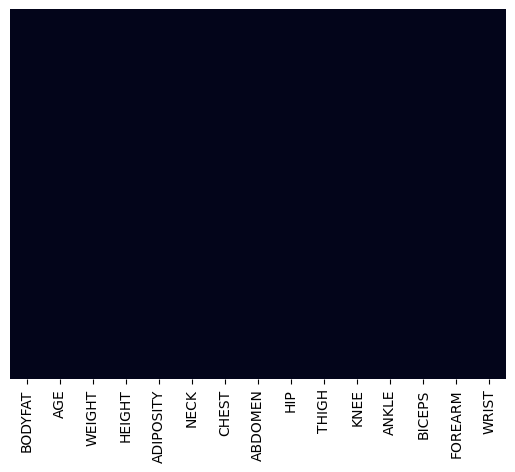

In [8]:
# checking missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar = False)
df.isnull().sum()

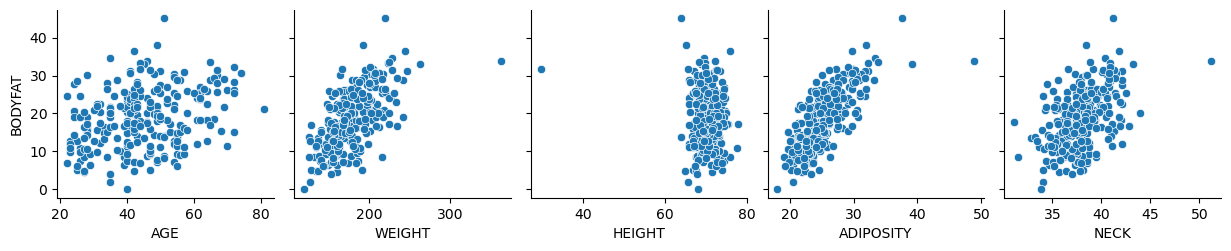

In [9]:
# feature VS bodyfat
sns.pairplot(df,x_vars = df.columns[1:6] ,y_vars=['BODYFAT'], kind="scatter")
plt.show()

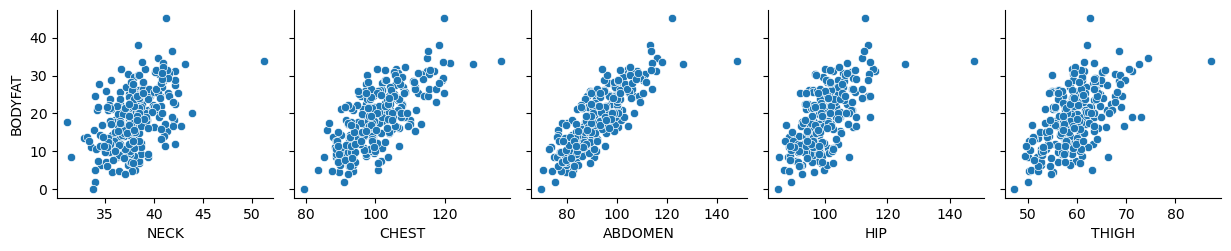

In [10]:
sns.pairplot(df,x_vars = df.columns[5:10] ,y_vars=['BODYFAT'], kind="scatter")
plt.show()

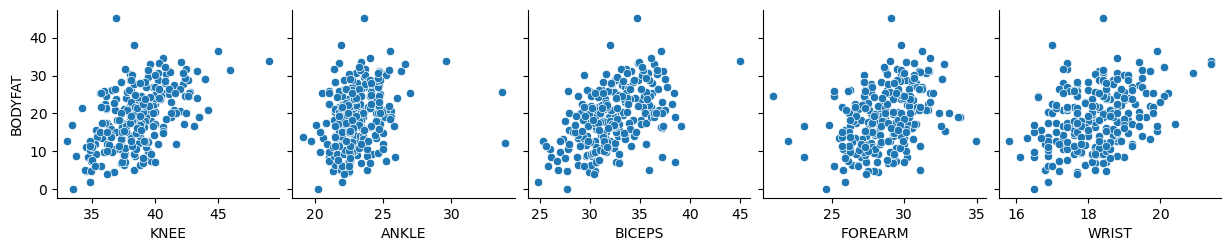

In [11]:
sns.pairplot(df,x_vars = df.columns[10:] ,y_vars=['BODYFAT'], kind="scatter")
plt.show()

array([[<Axes: title={'center': 'BODYFAT'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'WEIGHT'}>,
        <Axes: title={'center': 'HEIGHT'}>],
       [<Axes: title={'center': 'ADIPOSITY'}>,
        <Axes: title={'center': 'NECK'}>,
        <Axes: title={'center': 'CHEST'}>,
        <Axes: title={'center': 'ABDOMEN'}>],
       [<Axes: title={'center': 'HIP'}>,
        <Axes: title={'center': 'THIGH'}>,
        <Axes: title={'center': 'KNEE'}>,
        <Axes: title={'center': 'ANKLE'}>],
       [<Axes: title={'center': 'BICEPS'}>,
        <Axes: title={'center': 'FOREARM'}>,
        <Axes: title={'center': 'WRIST'}>, <Axes: >]], dtype=object)

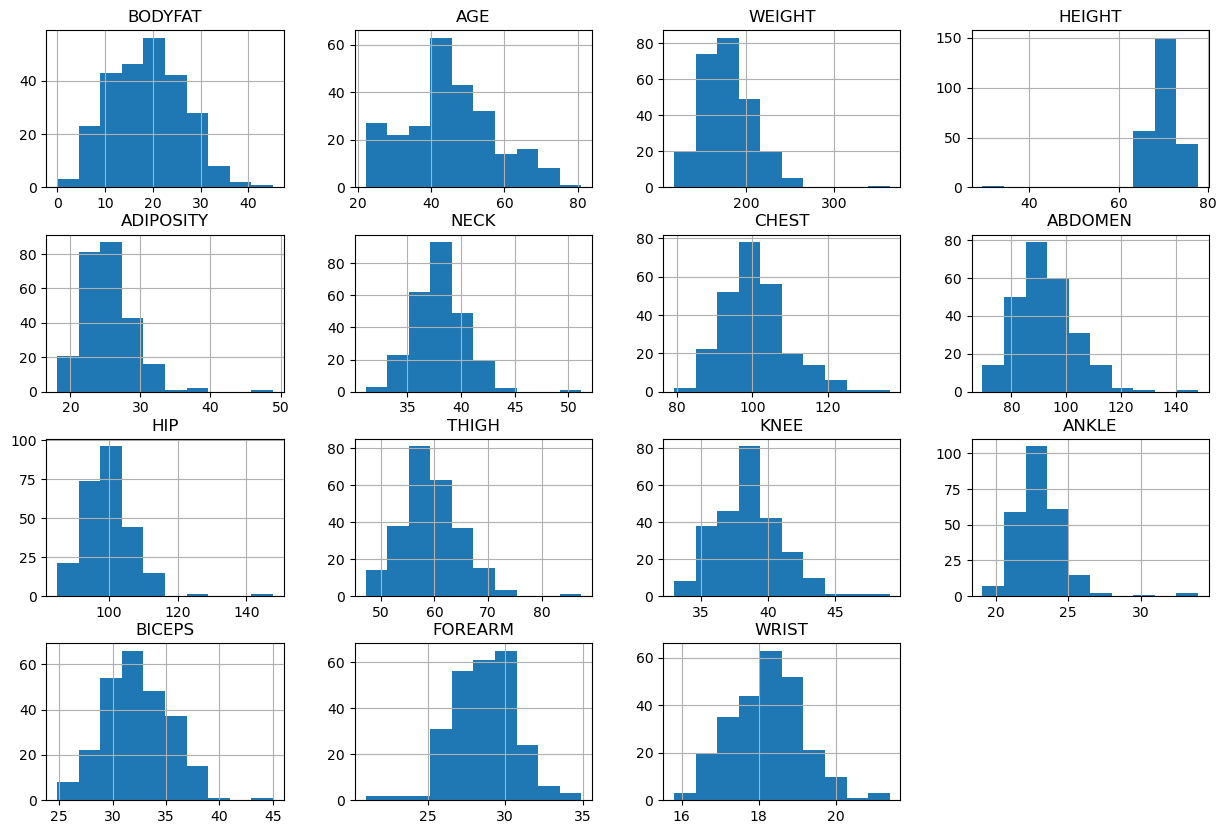

In [12]:
# checking distribution
df.hist(figsize=(15, 10))

In [13]:
zscore = abs(scipy.stats.zscore(df))
zscore;

In [14]:
def outlier_detect(feature):
    outlier = df[zscore[feature]>3].index
    return outlier

outlier_dict = {}
for feature in cols[1:]:
    outlier_dict[feature] = outlier_detect(feature)
    
outlier_dict["BODYFAT"] = df[zscore["BODYFAT"]>2.3].index

outlier_dict

{'AGE': Int64Index([], dtype='int64'),
 'WEIGHT': Int64Index([38], dtype='int64'),
 'HEIGHT': Int64Index([41], dtype='int64'),
 'ADIPOSITY': Int64Index([38, 40, 215], dtype='int64'),
 'NECK': Int64Index([38], dtype='int64'),
 'CHEST': Int64Index([38, 40], dtype='int64'),
 'ABDOMEN': Int64Index([38, 40], dtype='int64'),
 'HIP': Int64Index([38, 40], dtype='int64'),
 'THIGH': Int64Index([38], dtype='int64'),
 'KNEE': Int64Index([38, 243], dtype='int64'),
 'ANKLE': Int64Index([30, 38, 85], dtype='int64'),
 'BICEPS': Int64Index([38], dtype='int64'),
 'FOREARM': Int64Index([158, 174, 225], dtype='int64'),
 'WRIST': Int64Index([38, 40], dtype='int64'),
 'BODYFAT': Int64Index([35, 181, 215], dtype='int64')}

(array([20., 22., 23., 37., 42., 37., 28., 12., 15.,  9.,  6.,  1.]),
 array([22., 27., 32., 37., 42., 47., 52., 57., 62., 67., 72., 77., 82.]),
 <BarContainer object of 12 artists>)

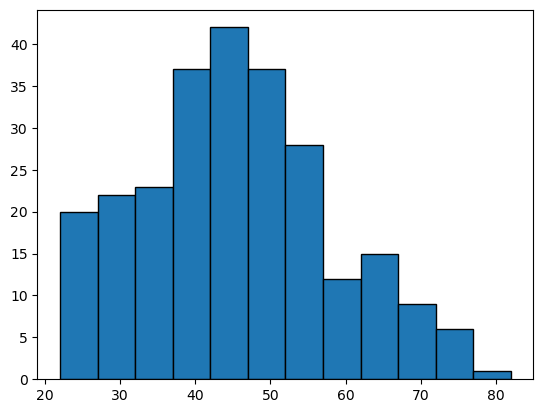

In [15]:
# checking sample size for replacing outliers
plt.hist(df['AGE'], bins=range(min(df['AGE']), max(df['AGE']) + 5, 5), edgecolor='k')

In [16]:
def outlier_replace(feature):
    if len(outlier_dict[feature]) != 0: 
        for i in range(0,len(outlier_dict[feature])):
            
            outlier_index = outlier_dict[feature][i]    
            outlier_age = df.loc[outlier_index,'AGE']

            age_min = outlier_age - 5
            age_max = outlier_age + 5
            
            condition = (df['AGE'] >= age_min) & (df['AGE'] <= age_max) & (df.index != outlier_index)

            # calculate the mean without considering the outlier's age
            ageRange_mean = df.loc[condition, feature].mean()
            
            # Replace the outlier with the mean value for the age range [age-5,age+5]
            df.loc[outlier_index, feature] = ageRange_mean
            
for feature in cols:
    outlier_replace(feature)

array([[<Axes: title={'center': 'BODYFAT'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'WEIGHT'}>,
        <Axes: title={'center': 'HEIGHT'}>],
       [<Axes: title={'center': 'ADIPOSITY'}>,
        <Axes: title={'center': 'NECK'}>,
        <Axes: title={'center': 'CHEST'}>,
        <Axes: title={'center': 'ABDOMEN'}>],
       [<Axes: title={'center': 'HIP'}>,
        <Axes: title={'center': 'THIGH'}>,
        <Axes: title={'center': 'KNEE'}>,
        <Axes: title={'center': 'ANKLE'}>],
       [<Axes: title={'center': 'BICEPS'}>,
        <Axes: title={'center': 'FOREARM'}>,
        <Axes: title={'center': 'WRIST'}>, <Axes: >]], dtype=object)

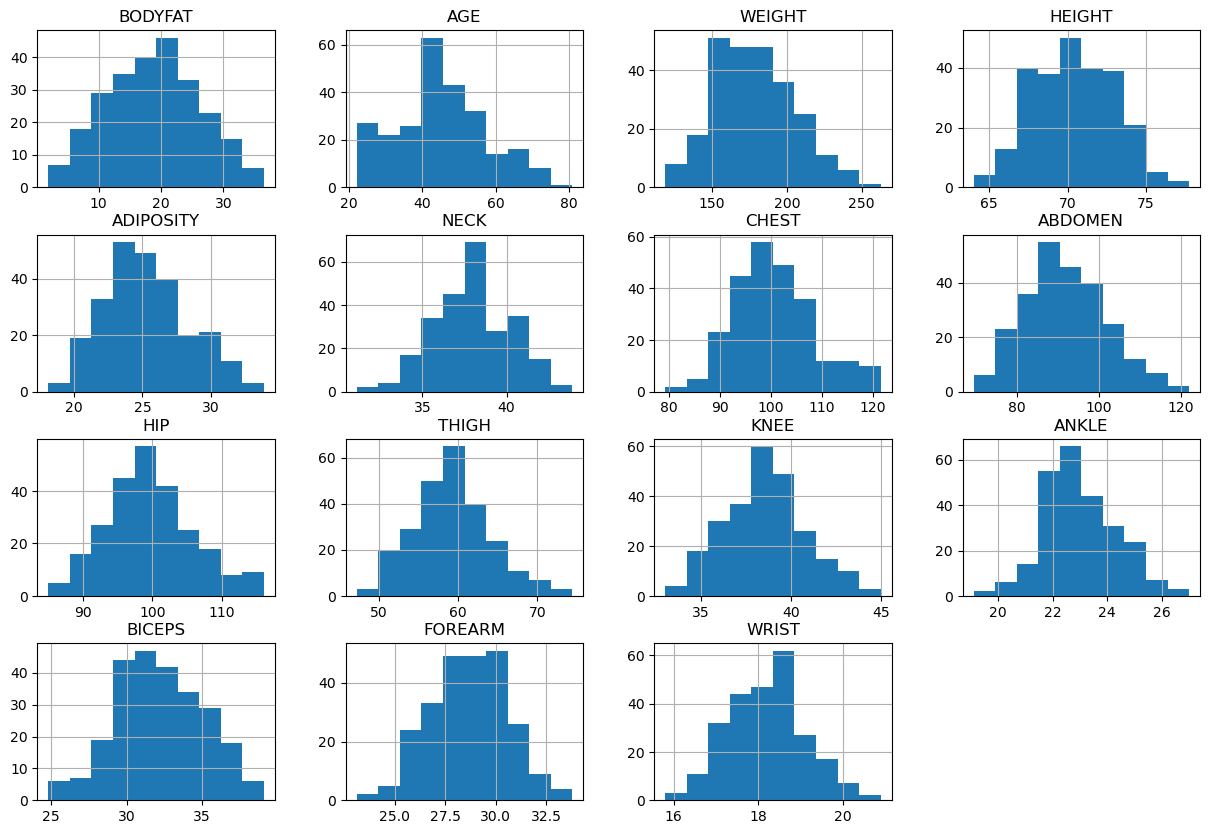

In [17]:
df.hist(figsize=(15, 10)) # histograms after fixing outliers

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.iloc[:,1:]
y = df.iloc[:,0]

ids = [i+1 for i in list(X.index)]
df['id'] = ids

youth = df[(df["AGE"]>=20) & (df["AGE"]<=40)]
adult = df[(df["AGE"]>=41) & (df["AGE"]<=60)]
olds = df[df["AGE"]>=61]

# randomly select same amount of test data from three age groups
youth_test= youth.sample(n=17,random_state=1)
adult_test = adult.sample(n=17,random_state=1)
olds_test = olds.sample(n=17,random_state=1)

X_youth_test = youth_test.iloc[:,1:]
X_adult_test = adult_test.iloc[:,1:]
X_olds_test = olds_test.iloc[:,1:]

y_youth_test = youth_test["BODYFAT"]
y_adult_test = adult_test["BODYFAT"]
y_olds_test = olds_test["BODYFAT"]

In [19]:
bad_youth = youth.id.isin(youth_test.id)
bad_adult = adult.id.isin(adult_test.id)
bad_olds = olds.id.isin(olds_test.id)

# combining the rest of the data into training dataset
youth_train = youth[~bad_youth]
adult_train = adult[~bad_adult]
olds_train = olds[~bad_olds]

X_youth_train = youth_train.iloc[:,1:]
X_adult_train = adult_train.iloc[:,1:]
X_olds_train = olds_train.iloc[:,1:]

y_youth_train = youth_train["BODYFAT"]
y_adult_train = adult_train["BODYFAT"]
y_olds_train = olds_train["BODYFAT"]

In [20]:
X_test = pd.concat([X_youth_test, X_adult_test, X_olds_test], ignore_index = False)
X_train = pd.concat([X_youth_train, X_adult_train, X_olds_train], ignore_index = False)
y_train = pd.concat([y_youth_train, y_adult_train,y_olds_train], axis=0).tolist()
y_test = pd.concat([y_youth_test, y_adult_test,y_olds_test], axis=0).tolist()

In [21]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.iloc[:, :-1]))
X_test_scaled = pd.DataFrame(scaler.transform(X_test.iloc[:, :-1]))

X_train_scaled.columns = cols[1:]
X_test_scaled.columns = cols[1:]

X_train_scaled['id'] = X_train['id'].tolist()
X_test_scaled['id'] = X_test['id'].tolist()

# the final train/test data
train_df = X_train_scaled
train_df["BODYFAT"] = y_train
test_df = X_test_scaled
test_df["BODYFAT"] = y_test

In [22]:
#train_df.to_csv('Train.csv')
#test_df.to_csv('Test.csv')

In [23]:
#cleaned_data = pd.concat([train_df,test_df],axis = 0)
#cleaned_data.to_csv("CleanedData.csv")